# Scripts for Chapter 1

# Calculating the mean of a list with statistics

In [1]:
import statistics
statistics.mean([1,2,3,4])

2.5

# Calculating with NumPY

In [2]:
import numpy as np
our_numbers = np.array([1,2,3,4])
np.mean(our_numbers)
np.std(our_numbers)

1.118033988749895

# Your first Histogram

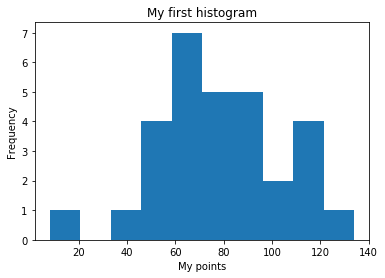

In [4]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([91,49,76,112,97,42,70,100,8,112,95,\
                 90,78,62,56,94,65,58,109,70,109,91,71,76,68,62,134,\
                 57,83,66])
plt.hist(data)
#plt.hist(data,density=True)
plt.title("My first histogram")
plt.xlabel("My points")
plt.ylabel("Frequency")
#plt.ylabel("Density")
plt.show()

# Probability density function

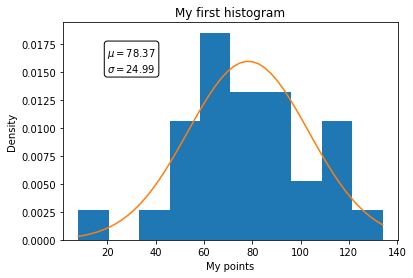

In [6]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([91,49,76,112,97,42,70,100,8,112,95,\
                 90,78,62,56,94,65,58,109,70,109,91,71,76,68,62,134,\
                 57,83,66])
heights,bins,patches = plt.hist(data,density=True)
mu,sigma = np.mean(data),np.std(data)
x = np.linspace(bins[0],bins[-1])
y = (1/(np.sqrt(2*np.pi)*sigma))*\
np.exp(-(x-mu)**2/(2*sigma**2))
plt.plot(x,y)
plt.title("My first histogram")
plt.xlabel("My points")
plt.ylabel("Density")
info ='$\mu=$'+str(round(mu,2))+'\n'+\
'$\sigma=$'+str(round(sigma,2))
plt.text(20,0.015,info,bbox=dict(facecolor='none',edgecolor='black', boxstyle='round'))
plt.show()

# Scatter plot

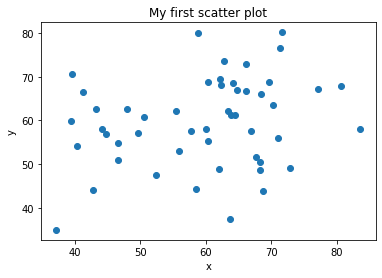

In [7]:
import numpy as np
import matplotlib.pyplot as plt
mu,sigma,n = 60,10,50
x = np.random.normal(mu,sigma,n)
y = np.random.normal(mu,sigma,n)
plt.scatter(x,y)
plt.xlabel("x"); plt.ylabel("y")
plt.title("My first scatter plot")
plt.show()

# Your first time series plot

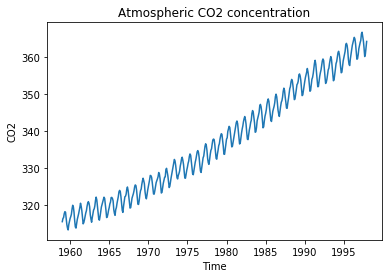

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
url="https://raw.githubusercontent.com/DavidArmendariz/"+\
"databases/master/atmospheric_CO2.csv"
df=pd.read_csv(url,names=["Dates","CO2"])
df["Dates"]=pd.to_datetime(df["Dates"],format="%Y-%m-%d")
plt.plot(df["Dates"],df["CO2"])
plt.xlabel("Time"); plt.ylabel("CO2")
plt.title("Atmospheric CO2 concentration")
plt.show()

# Regression function

In [12]:
import numpy as np
def regression(X,y):
    xbar = np.mean(X)
    ybar = np.mean(y)
    b1 = np.sum((X-xbar)*(y-ybar))/np.sum((X-xbar)**2)
    b0 = ybar-b1*xbar
    f = lambda x: b0+b1*x
    yhat = f(X)
    e = y-yhat
    return b0,b1,e,yhat

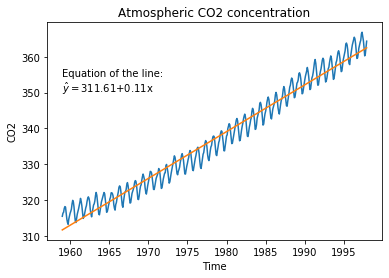

In [13]:
X = np.array(range(len(df)))
y = df["CO2"]
b0,b1,e,yhat = regression(X,y)
plt.plot(df["Dates"],df["CO2"])
plt.plot(df["Dates"],yhat)
plt.xlabel("Time"); plt.ylabel("CO2")
info ="Equation of the line:\n"+\
"$\hat{y}=$"+str(round(b0,2))+"+"+\
str(round(b1,2))+"x"
plt.text(df["Dates"][0],350,info)
plt.title("Atmospheric CO2 concentration")
plt.show()

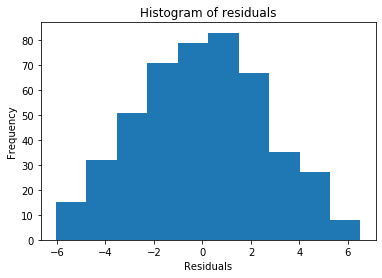

In [14]:
plt.hist(e)
plt.xlabel("Residuals"); plt.ylabel("Frequency")
plt.title("Histogram of residuals")
plt.show()

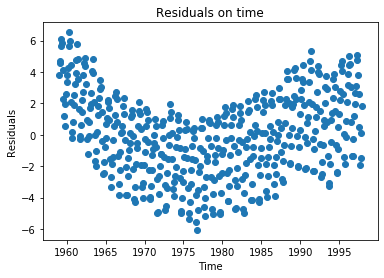

In [15]:
plt.scatter(df["Dates"],e)
plt.xlabel("Time"); plt.ylabel("Residuals")
plt.title("Residuals on time")
plt.show()

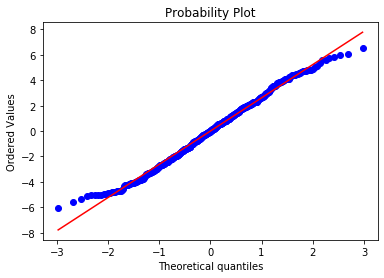

In [16]:
from scipy import stats
res = stats.probplot(e, plot=plt)
plt.show()

# Hypothesis testing...

Text(0, 0.5, 'Parking time (seconds)')

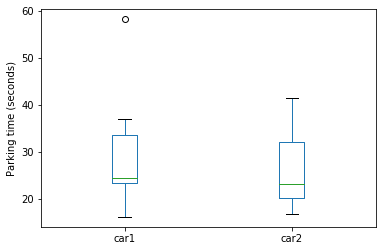

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
url="https://raw.githubusercontent.com/DavidArmendariz/"+\
"databases/master/parking_time.csv"
df=pd.read_csv(url)
df.boxplot()
plt.suptitle(''); plt.grid(False)
plt.ylabel("Parking time (seconds)")

# Function to do hypothesis testing!

In [18]:
from scipy.stats import t
def pairedttest(data,col1,col2,delta,a,test="two-sided"):
    T0 = (np.mean(data[col1]-data[col2])-delta)/\
    (np.std(data[col1]-data[col2])/np.sqrt(len(data)))
    v = len(data)-1
    rejected = False
    if test =="two-sided":
        t_critical = np.abs(t.ppf(a/2,v))
        p = 2*(1-t.cdf(np.abs(T0),v))
        if T0 > t_critical or T0 < -t_critical:
            rejected = True
    elif test =="one-sided right":
        t_critical = np.abs(t.ppf(a,v))
        p = 1-t.cdf(T0,v)
        if T0 > t_critical:
            rejected = True
    elif test =="one-sided left":
        t_critical = np.abs(t.ppf(a,v))
        p = t.cdf(T0,v)
        if T0 < -t_critical:
            rejected = True
    if rejected == True:
        print("H0 rejected")
    else:
        print("H0 not rejected")
    print("p-value: ",p)
    print("T0 statistic: ",T0)
    print("T critical: ",t_critical)

In [19]:
pairedttest(df,"car1","car2",0,0.05)

H0 not rejected
p-value:  0.29585446508196944
T0 statistic:  1.0929905057014093
T critical:  2.178812829663418


In [20]:
from scipy.stats import ttest_rel
ttest_rel(df["car1"],df["car2"])

Ttest_relResult(statistic=1.0501113108267313, pvalue=0.31435575532406856)

# Correlation

           Girth   Height    Volume
Girth   1.000000  0.51928  0.967119
Height  0.519280  1.00000  0.598250
Volume  0.967119  0.59825  1.000000


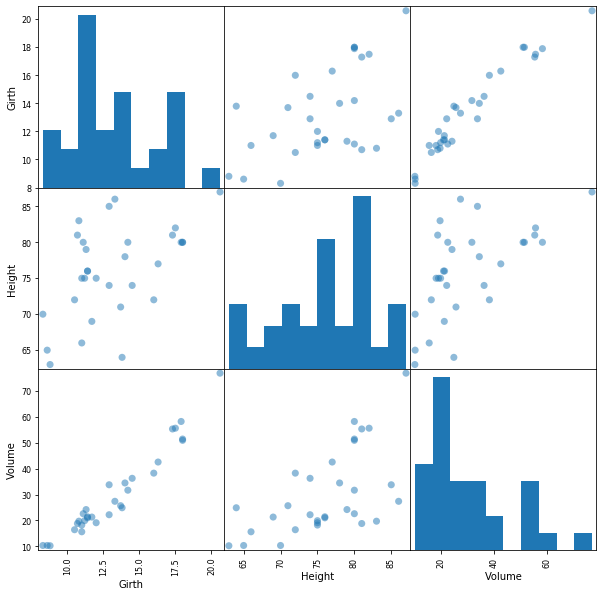

In [21]:
import pandas as pd
url="https://raw.githubusercontent.com/DavidArmendariz/"+\
"databases/master/trees.csv"
df=pd.read_csv(url)
pp=pd.plotting.scatter_matrix(df,figsize=(10,10),s=200)
print(df.corr())